# Assignment 1: Classical Machine Learning
Jie Wang

Oct 18 2023

## Question 1: Linear Regression on a Cosine Function

Given the following points $$(t, y):(1, 2.4), (2, 1.3), (3, -0.5), (4, 1.6), (5, 2.8)$$

Use linear regression to fit the function:
$$ y = w_0 + w_1 cos(2t) + w_2 cos(5t)$$

Determine the values of W0, W1, W2.

To fit the given function $ y = w_0 + w_1 \cos(2t) + w_2 \cos(5t) $ using linear regression, we need to perform the following steps:

1. Calculate the design matrix $ \mathbf{X} $ and target vector $ \mathbf{y} $.
2. Use the linear regression formula to find $ \mathbf{W} = (w_0, w_1, w_2) $:
$$
\mathbf{W} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

3. Plot the data points and the fitted curve.

Here's the plot of the given data points. 

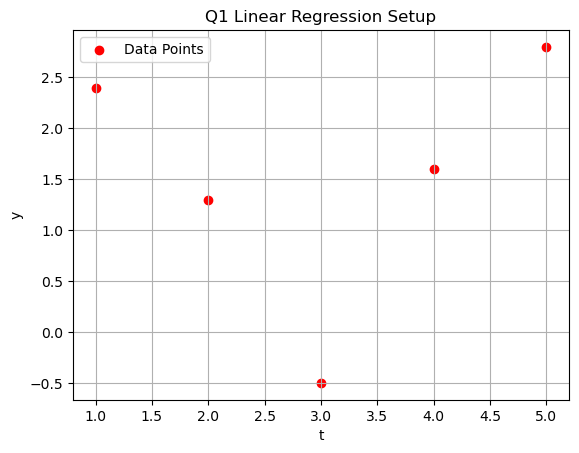

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Given data points (t, y)
t_points = np.array([1, 2, 3, 4, 5])
y_points = np.array([2.4, 1.3, -0.5, 1.6, 2.8])

# Plot the given data points
plt.scatter(t_points, y_points, color='red', label='Data Points')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Q1 Linear Regression Setup')
plt.legend()
plt.grid(True)
plt.show()


Next, let's determine the values of $ W_0 $, $ W_1 $, and $ W_2 $ using linear regression.

To do this, we'll first create the design matrix $ \mathbf{X} $ and the target vector $ \mathbf{y} $. The design matrix for our function $ y = w_0 + w_1 \cos(2t) + w_2 \cos(5t) $ will have 3 columns:

1. The first column will be all ones, corresponding to the $ w_0 $ term.
2. The second column will be $ \cos(2t) $, corresponding to the $ w_1 $ term.
3. The third column will be $ \cos(5t) $, corresponding to the $ w_2 $ term.




In [37]:
from numpy.linalg import inv

X = np.column_stack((np.ones(t_points.shape), np.cos(2 * t_points), np.cos(5 * t_points)))

y = y_points

W = inv(X.T.dot(X)).dot(X.T).dot(y)
W


array([ 1.24959219, -1.17768804,  0.75334737])


The calculated values for the weights $ W_0 $, $ W_1 $, and $ W_2 $ are approximately:

$$
W_0 \approx 1.25 \\
W_1 \approx -1.18 \\
W_2 \approx 0.75
$$

### Plot of fitted data
Here's the plot showing both the original data points (in red) and the fitted curve (in blue) based on the linear regression model $ y = w_0 + w_1 \cos(2t) + w_2 \cos(5t) $.

The result implies that our fitted curve appears to capture the trend of the data points quite well.

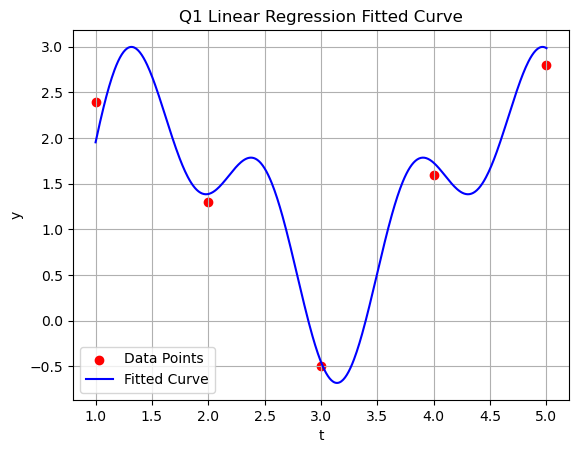

In [38]:
t_values = np.linspace(min(t_points), max(t_points), 500)

y_fitted = W[0] + W[1] * np.cos(2 * t_values) + W[2] * np.cos(5 * t_values)

plt.scatter(t_points, y_points, color='red', label='Data Points')

# Plot the fitted curve
plt.plot(t_values, y_fitted, color='blue', label='Fitted Curve')

plt.xlabel('t')
plt.ylabel('y')
plt.title('Q1 Linear Regression Fitted Curve')
plt.legend()
plt.grid(True)
plt.show()


## Question 2: kNN Classification

Given the data points and their labels:
$$[(2,3), A], [(4,2), B], [(1,1), A], [(5,4), B], [(3,2), A], [(6,5), B], [(5,2), B], [(2,4), A], [(3,5), A], [(4,4), B] $$

Predict the label for a new point (4,3) when k=1 and k=3.

For Python, the key library is `sklearn.neighbors` with the main function being `KNeighborsClassifier`.

For this question, we visualize the data points as below.
Then, we can easily find the prediction label using KNN from sklearn.

As for the tie-break condition, we set the priority of closeness in clockwise direction, i.e., $'UP', 'RIGHT', 'DOWN','LEFT' $.


The label for the point (4, 3) with k=1 is B
The label for the point (4, 3) with k=3 is B


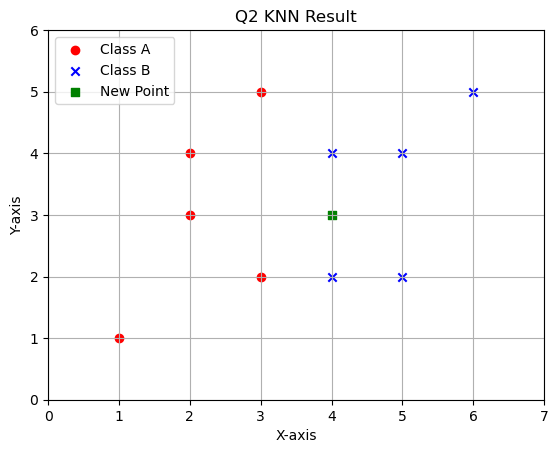

In [39]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Given data points and labels
X = np.array([[2, 3], [4, 2], [1, 1], [5, 4], [3, 2], [6, 5], [5, 2], [2, 4], [3, 5], [4, 4]])
y = np.array(['A', 'B', 'A', 'B', 'A', 'B', 'B', 'A', 'A', 'B'])

# New point
new_point = np.array([4, 3])

def Q2_KNN(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    label1 = knn.predict([new_point])[0]
    print(f"The label for the point (4, 3) with k={k} is {label1[0]}")

Q2_KNN(1)
Q2_KNN(3)


# Separate the points by label
X_A = X[y == 'A']
X_B = X[y == 'B']

# Plot the points
plt.scatter(X_A[:, 0], X_A[:, 1], label='Class A', color='red', marker='o')
plt.scatter(X_B[:, 0], X_B[:, 1], label='Class B', color='blue', marker='x')
plt.scatter(new_point[0], new_point[1], label='New Point', color='green', marker='s')

plt.title('Q2 KNN Result')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.xlim([0,7])
plt.ylim([0,6])
plt.show()


In fact, we can easily obtain the label of new points based on the data set.
- For k = 1, the nearest one point is clearly blue point [4,4] at the 'UP'
- For k = 3, the nearest three points are [4,4],[4,2],[5,4], all are blue

Therefore, label is predicted as 'B'

I wrote a simple visualization function to further prove this.

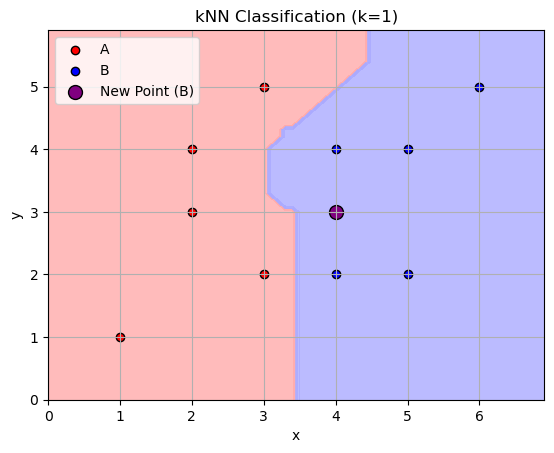

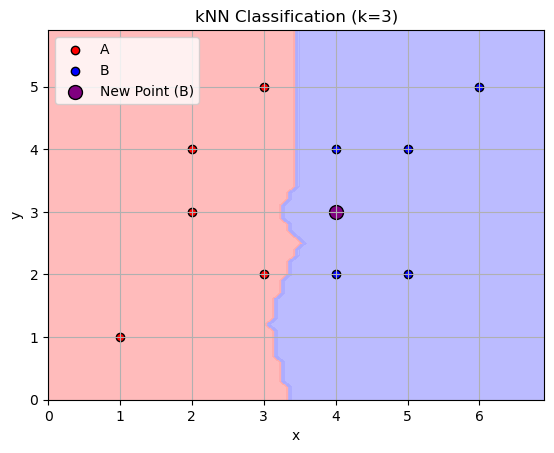

('B', 'B')

In [40]:
from matplotlib.colors import ListedColormap
# Define a function to perform kNN classification and visualize the results
def knn_visualization(k, data_points, labels, new_point):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data_points, labels)
    predicted_label = knn.predict([new_point])[0]
    
    # Visualize the kNN classification result
    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_points = ListedColormap(['#FF0000', '#0000FF'])
    
    # Create a mesh grid for the background
    h = 0.1  # Step size
    x_min, x_max = data_points[:, 0].min() - 1, data_points[:, 0].max() + 1
    y_min, y_max = data_points[:, 1].min() - 1, data_points[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the labels for the mesh grid points
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array([0 if label == 'A' else 1 for label in Z])
    Z = Z.reshape(xx.shape)
    
    # Plot the background
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_background)
    
    # Plot the original data points
    plt.scatter(data_points[labels == 'A'][:, 0], data_points[labels == 'A'][:, 1], color='red', label='A', edgecolor='k')
    plt.scatter(data_points[labels == 'B'][:, 0], data_points[labels == 'B'][:, 1], color='blue', label='B', edgecolor='k')
    
    # Plot the new point
    plt.scatter(new_point[0], new_point[1], color='green' if predicted_label == 'A' else 'purple', label=f'New Point ({predicted_label})', s=100, edgecolor='k')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'kNN Classification (k={k})')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return predicted_label

predicted_label_k1 = knn_visualization(1, X, y, new_point)
predicted_label_k3 = knn_visualization(3, X, y, new_point)

predicted_label_k1, predicted_label_k3


Such diagram further prove the correctness in a more convinient way


## Question 3: SVM Classification

Using 10 2D points and their labels, determine the support vectors using SVM and provide the decision rule.

Given the data points and their labels:

$$ X= [[2,3], [4,2], [1,1], [5,4], [3,2], [6,5], [5,2], [2,4], [3,5], [4,4]] \\

y = ['A', 'B', 'A', 'B', 'A', 'B', 'B', 'A', 'A', 'B']
$$

For Python, you can retrieve w1, w2 using `clf.coef_` and b using `clf.intercept_` after training your SVM.

For MATLAB, after fitting your SVM model, you can retrieve the coefficients using sVMModel.Beta and the intercept with SVMModel.Bias.

### Solution
Support Vector Machines (SVM) are a classcical supervised learning algorithms used for classification. 

In the given 2D classification task, the SVM will find the hyperplane ( one line here) that best separates the two classes while maximizing the margin between them.

The decision rule for a linear SVM in 2D can be represented as:

$$
\text{Decision Rule: } \\
if (w_1 \cdot x_1 + w_2 \cdot x_2 + b) >= 0,\ classfied \ as\  'A'\\
if (w_1 \cdot x_1 + w_2 \cdot x_2 + b) < 0,\ classfied \ as\ 'B
'

$$

where $w_1$ and $w_2$ are the weights for each feature, and $b$ is the bias term.

We'll use the `SVC` (Support Vector Classification) class from `sklearn.svm`. Then we'll visualize the SVM along with the support vectors.




Support Vectors:
 [[3. 2.]
 [3. 5.]
 [4. 2.]
 [4. 4.]]
w1 = 1.7000000000000002, w2 = -0.09999999999999964
b = -5.6


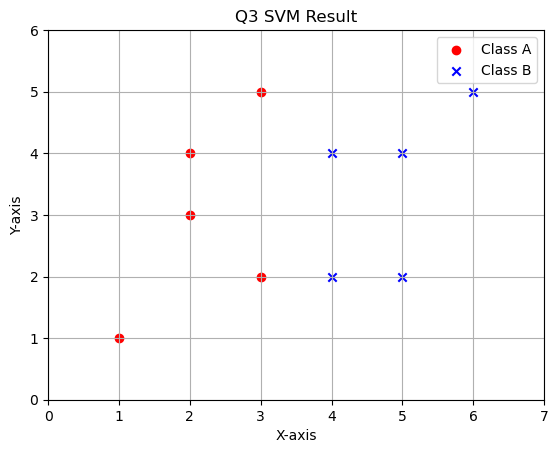

In [41]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

# Given data points and their labels
X = np.array([[2, 3], [4, 2], [1, 1], [5, 4], [3, 2], [6, 5], [5, 2], [2, 4], [3, 5], [4, 4]])
y = np.array(['A', 'B', 'A', 'B', 'A', 'B', 'B', 'A', 'A', 'B'])

# Train the SVM classifier
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)

# Retrieve the coefficients and intercept
w = clf.coef_[0]
b = clf.intercept_[0]

# Retrieve support vectors
support_vectors = clf.support_vectors_

print("Support Vectors:\n", support_vectors)
print(f"w1 = {w[0]}, w2 = {w[1]}")
print(f"b = {b}")


# Separate the points by label
X_A = X[y == 'A']
X_B = X[y == 'B']

# Plot the points

plt.scatter(X_A[:, 0], X_A[:, 1], label='Class A', color='red', marker='o')
plt.scatter(X_B[:, 0], X_B[:, 1], label='Class B', color='blue', marker='x')

plt.title('Q3 SVM Result')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.xlim([0,7])
plt.ylim([0,6])
plt.show()


The calculated parameters for the SVM are as follows:

- Weights: $ w_1 = 1.7 $ and $ w_2 = -0.1 $
- Bias term: $ b = -5.6 $

The support vectors are:
$$
\begin{align*}
&[3, 2], \\
&[3, 5], \\
&[4, 2], \\
&[4, 4]
\end{align*}
$$

The decision rule for classifying a new point $$(x_1, x_2)$$ can thus be represented as:

$$
\text{Decision Rule: } \text{sign}(1.7 \cdot x_1 - 0.1 \cdot x_2 - 5.6)
$$
To further display the result, I wrote a simple visualization function. 

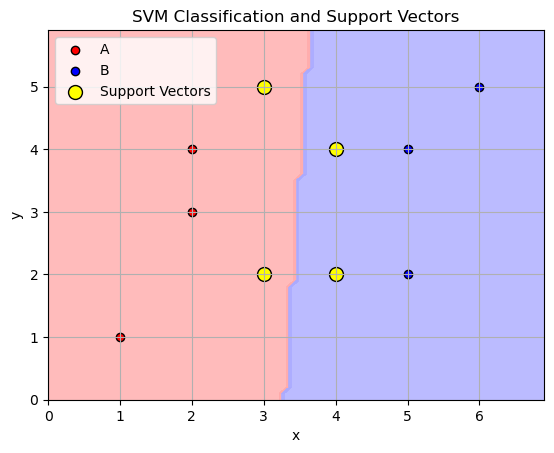

In [42]:
# Define a function to visualize the SVM and the support vectors
def svm_visualization(w, b, support_vectors, data_points, labels):
    # Generate a mesh grid for the background
    x_min, x_max = data_points[:, 0].min() - 1, data_points[:, 0].max() + 1
    y_min, y_max = data_points[:, 1].min() - 1, data_points[:, 1].max() + 1
    h = 0.1  # Step size
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Compute the decision boundary
    Z = w[0] * xx + w[1] * yy + b
    Z = np.sign(Z)
    
    # Plot the background
    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_background)
    
    # Plot the original data points
    plt.scatter(data_points[labels == 'A'][:, 0], data_points[labels == 'A'][:, 1], color='red', label='A', edgecolor='k')
    plt.scatter(data_points[labels == 'B'][:, 0], data_points[labels == 'B'][:, 1], color='blue', label='B', edgecolor='k')
    
    # Plot the support vectors
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='yellow', label='Support Vectors', s=100, edgecolor='k')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('SVM Classification and Support Vectors')
    plt.legend()
    plt.grid(True)
    plt.show()

svm_visualization(w, b, support_vectors, X, y)



Here's the visualization of the SVM classification along with the support vectors, which are marked in yellow.

- The red points represent class 'A'.
- The blue points represent class 'B'.
- The yellow points are the support vectors.

The background color indicates the decision boundary formed by the SVM. As you can see, the support vectors are the points closest to the decision boundary and are instrumental in determining it.
